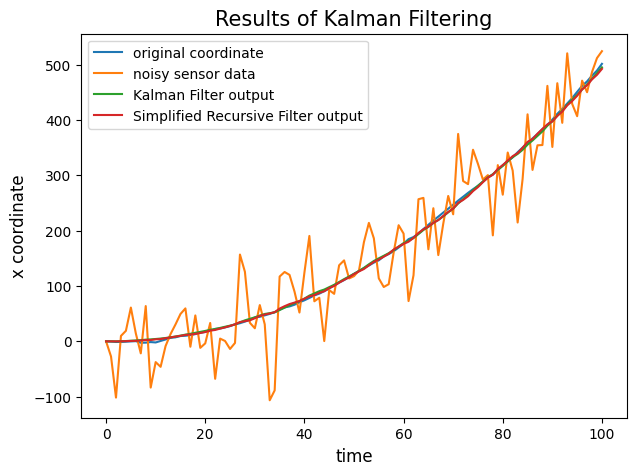

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

N = 100  # number of samples
a = 0.1  # acceleration
x = np.zeros(N+1)
z = np.zeros(N+1)


time = np.arange(0, N+1, 1)
muPsi, sigmaPsi = 0, 1     
muEta, sigmaEta = 0, 50     
errorPsi = np.random.normal(muPsi, sigmaPsi, 100)   
errorEta = np.random.normal(muEta, sigmaEta, 100)   

for t in range(0, N):
    x[t+1] = x[t] + a * t + np.random.normal(muPsi, sigmaPsi, 1)
    z[t+1] = x[t+1] + np.random.normal(muEta, sigmaEta, 1)
    
eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)

rec_Opt = np.zeros(N+1)

for t in range(0, N):
    eOpt[t+1] = np.sqrt((sigmaEta**2) * (eOpt[t]**2 + sigmaPsi**2)/(sigmaEta**2 + eOpt[t]**2 + sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(sigmaEta**2)
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]

for t in range(0, N):
    rec_Opt[t + 1] = K[t + 1] * z[t + 1] + (1 - K[t + 1]) * rOpt[t]
    
plt.subplot(1,2,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Results of Kalman Filtering',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, label='noisy sensor data')  
plt.plot(time, xOpt, label='Kalman Filter output') 
plt.plot(time, rec_Opt, label='Simplified Recursive Filter output')
plt.legend()

plt.subplots_adjust(bottom=0.1, right=2, top=0.9)